# Steps:

## Import relevant libraries/Modules
- **Basic EDA**
  - Missing Data
  - Duplicate Data
  - Outliers or Anomalies
  - Data Visualization
  - Feature Encoding
  - Feature Selection
- **Model Building**
  - Separate your independent data and dependent data
  - Split your data into Training and Testing set
  - Model Selection
  - Model Training
  - Model Prediction
  - Model Evaluation

In [2]:
!pip install xgboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('loan_detection.csv')
df.head(100)

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
96,42,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
97,53,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
98,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
df.shape

(41188, 60)

# Basic EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [7]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [8]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.nunique()

age                              78
campaign                         42
pdays                            27
previous                          8
no_previous_contact               2
not_working                       2
job_admin.                        2
job_blue-collar                   2
job_entrepreneur                  2
job_housemaid                     2
job_management                    2
job_retired                       2
job_self-employed                 2
job_services                      2
job_student                       2
job_technician                    2
job_unemployed                    2
job_unknown                       2
marital_divorced                  2
marital_married                   2
marital_single                    2
marital_unknown                   2
education_basic.4y                2
education_basic.6y                2
education_basic.9y                2
education_high.school             2
education_illiterate              2
education_professional.cours

In [10]:
df['age']

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

# Imbalance Data

In [11]:
df['Loan_Status_label']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 41188, dtype: int64

In [12]:
df['Loan_Status_label'].value_counts()

Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64

In [13]:
print(round(len(df[df['Loan_Status_label'] == 0])/len(df)*100))
print(round(len(df[df['Loan_Status_label'] == 1])/len(df)*100))

89
11


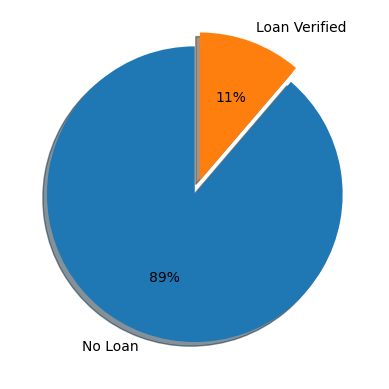

In [14]:
plt.pie(df['Loan_Status_label'].value_counts(), autopct = "%1.0f%%", startangle = 90, shadow = True, labels = ['No Loan', 'Loan Verified'], explode = (0, 0.1))
plt.show()

# Missing Data

In [15]:
df.isnull().any()

age                              False
campaign                         False
pdays                            False
previous                         False
no_previous_contact              False
not_working                      False
job_admin.                       False
job_blue-collar                  False
job_entrepreneur                 False
job_housemaid                    False
job_management                   False
job_retired                      False
job_self-employed                False
job_services                     False
job_student                      False
job_technician                   False
job_unemployed                   False
job_unknown                      False
marital_divorced                 False
marital_married                  False
marital_single                   False
marital_unknown                  False
education_basic.4y               False
education_basic.6y               False
education_basic.9y               False
education_high.school    

In [16]:
df.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [17]:
df['age'].skew()

0.7846968157646645

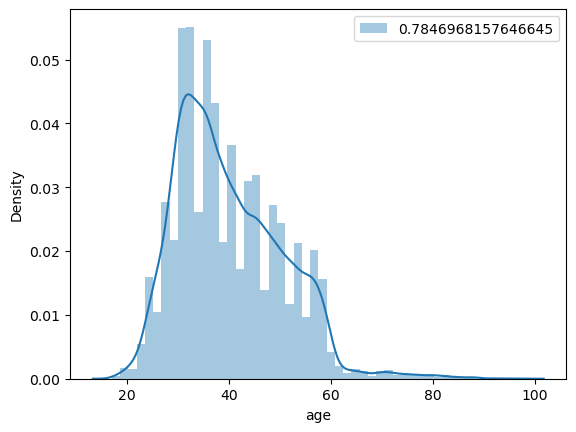

In [18]:
sns.distplot(df['age'], label=df['age'].skew())
plt.legend()
plt.show()

In [19]:
df['age'].mean()

40.02406040594348

In [20]:
df['age'].median()

38.0

In [21]:
for i in df:
    print(i)

age
campaign
pdays
previous
no_previous_contact
not_working
job_admin.
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
job_unknown
marital_divorced
marital_married
marital_single
marital_unknown
education_basic.4y
education_basic.6y
education_basic.9y
education_high.school
education_illiterate
education_professional.course
education_university.degree
education_unknown
default_no
default_unknown
default_yes
housing_no
housing_unknown
housing_yes
loan_no
loan_unknown
loan_yes
contact_cellular
contact_telephone
month_apr
month_aug
month_dec
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep
day_of_week_fri
day_of_week_mon
day_of_week_thu
day_of_week_tue
day_of_week_wed
poutcome_failure
poutcome_nonexistent
poutcome_success
Loan_Status_label


In [22]:
for i in df:
    if df[i].isna().sum() > 0:
        print(i)

# Duplicate Data

In [23]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [24]:
df.duplicated().sum()

2417

In [25]:
df[df.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
10,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16,35,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
31,59,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
104,52,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,21,1,999,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
41131,58,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
41167,32,3,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
41172,31,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [26]:
df.drop_duplicates(keep='first', inplace = True)

In [27]:
df[df.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label


In [28]:
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


# Outliers or Anomalies

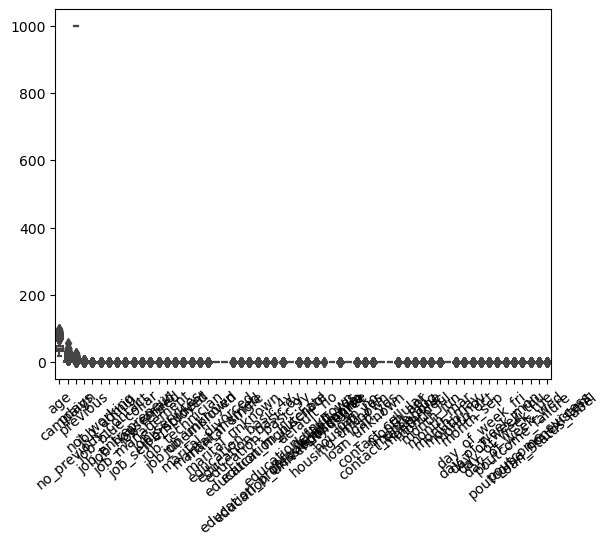

In [29]:
sns.boxplot(df)
plt.xticks(rotation = 40)
plt.show()

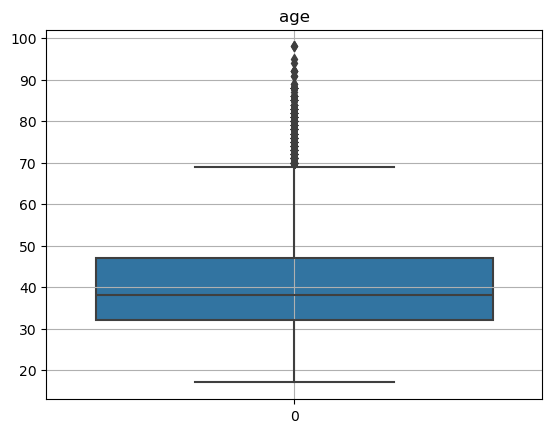

In [30]:
sns.boxplot(df['age'])
plt.title('age')
plt.grid()
plt.show()

In [31]:
df[df['age'] > 70]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
27757,76,9,999,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
27780,73,1,999,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
27800,88,1,999,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
27802,88,2,999,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
27805,88,5,999,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,4,3,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
40996,81,1,999,2,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
41004,80,1,999,1,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [32]:
len(df[df['age'] > 70])

410

In [33]:
df[(df['age'] > 70)].index

Index([27757, 27780, 27800, 27802, 27805, 27808, 27810, 27811, 27813, 27814,
       ...
       40965, 40966, 40969, 40982, 40983, 40986, 40996, 41004, 41183, 41187],
      dtype='int64', length=410)

In [34]:
df.shape

(38771, 60)

In [35]:
df.drop(df[(df['age'] > 70)].index, axis=0, inplace=True)

In [36]:
df.shape

(38361, 60)

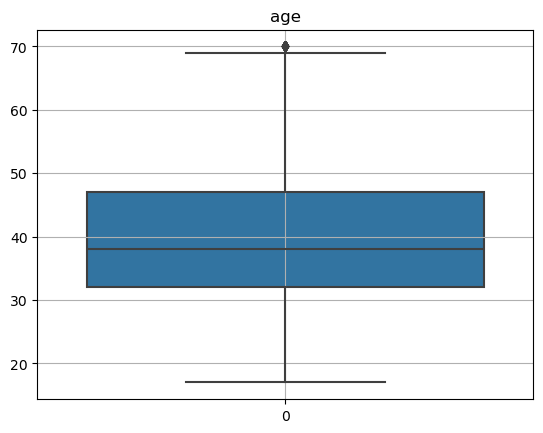

In [37]:
sns.boxplot(df['age'])
plt.title('age')
plt.grid()
plt.show()

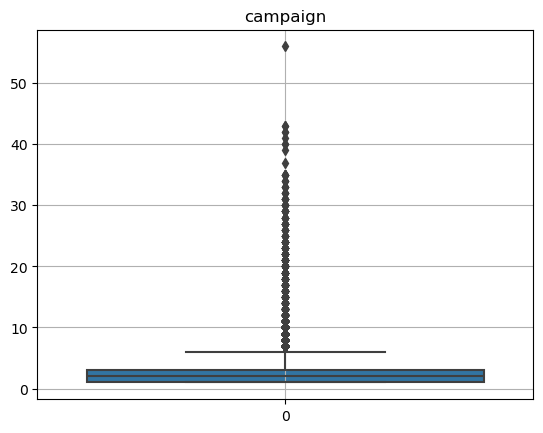

In [38]:
sns.boxplot(df['campaign'])
plt.title('campaign')
plt.grid()
plt.show()

In [39]:
df[df['campaign'] > 10]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
2189,56,11,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2234,47,12,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2554,31,13,999,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2589,47,11,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2590,47,11,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36884,56,15,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
37587,28,11,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
37876,29,12,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
37893,52,13,14,2,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [40]:
df[df['campaign'] > 10].index

Index([ 2189,  2234,  2554,  2589,  2590,  2613,  2631,  2660,  2735,  2866,
       ...
       35413, 35441, 35525, 35587, 35755, 36884, 37587, 37876, 37893, 40063],
      dtype='int64', length=866)

In [41]:
df.drop(df[(df['campaign'] > 10)].index, axis=0, inplace=True)

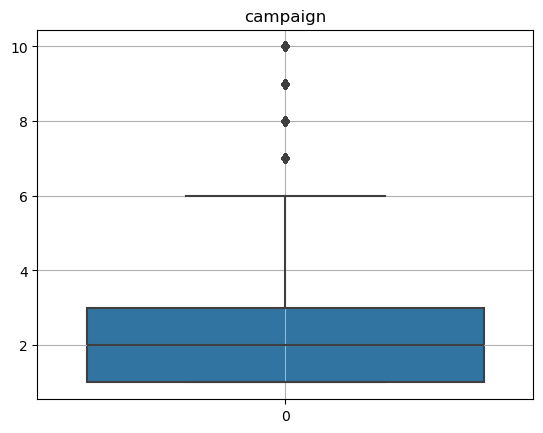

In [42]:
sns.boxplot(df['campaign'])
plt.title('campaign')
plt.grid()
plt.show()

In [43]:
df.shape

(37495, 60)

# ***Using IQR - Inter Quartile Range***

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
IQR

age                              15.0
campaign                          2.0
pdays                             0.0
previous                          0.0
no_previous_contact               0.0
not_working                       0.0
job_admin.                        1.0
job_blue-collar                   0.0
job_entrepreneur                  0.0
job_housemaid                     0.0
job_management                    0.0
job_retired                       0.0
job_self-employed                 0.0
job_services                      0.0
job_student                       0.0
job_technician                    0.0
job_unemployed                    0.0
job_unknown                       0.0
marital_divorced                  0.0
marital_married                   1.0
marital_single                    1.0
marital_unknown                   0.0
education_basic.4y                0.0
education_basic.6y                0.0
education_basic.9y                0.0
education_high.school             0.0
education_il

In [45]:
print(Q1 - 1.5*IQR)
print()
print(Q3 + 1.5*IQR)

age                                9.5
campaign                          -2.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                        -1.5
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                   -1.5
marital_single                    -1.5
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0.0
education_high.school    

In [46]:
lower_quartile = (Q1 - 1.5*IQR)
upper_quartile = (Q3 + 1.5*IQR)

In [47]:
df.shape

(37495, 60)

In [48]:
df[~((df < lower_quartile) | (df > upper_quartile)).any(axis=1)]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label


# Removed Outliers

In [49]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

data  = df[~((df < lower_quartile) | (df > upper_quartile)).any(axis = 1)]
data

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label


<Axes: >

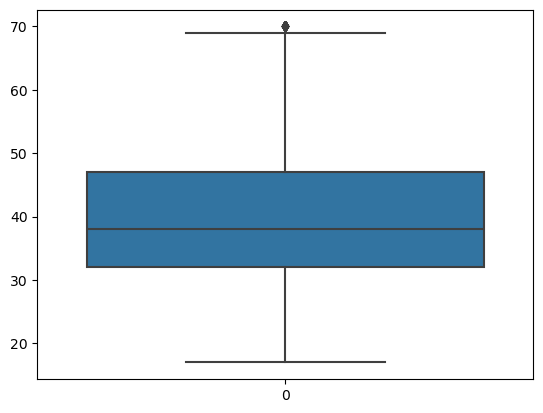

In [50]:
sns.boxplot(df['age'])

<Axes: >

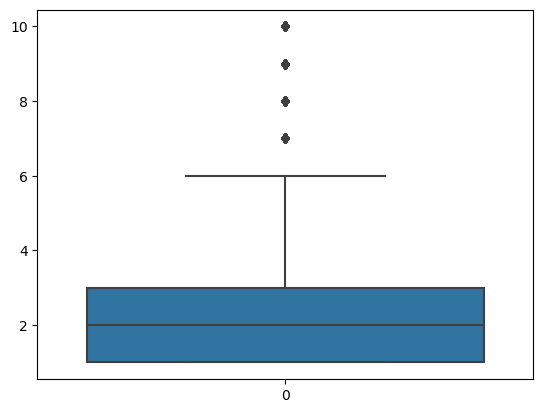

In [51]:
sns.boxplot(df['campaign'])

<Axes: >

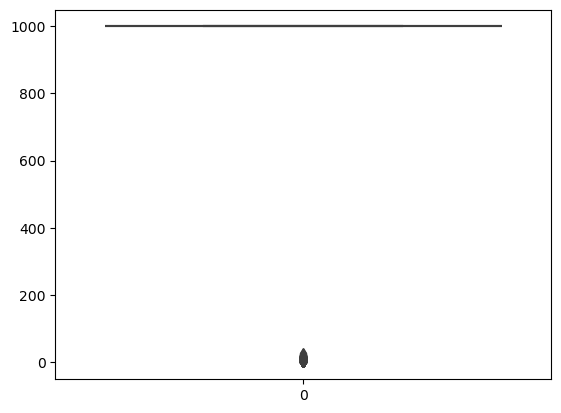

In [52]:
sns.boxplot(df['pdays'])

# Feature Encoding or Drop the Column

In [53]:
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,2,999,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41182,29,1,9,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# Feature Selection - Corr()

In [54]:
df.corr()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
age,1.000000,0.001472,0.002642,-0.020792,0.002701,0.111935,-0.079731,-0.009721,0.036950,0.085243,...,0.008538,0.008683,0.020601,-0.020725,0.015206,-0.023749,-0.023993,0.021659,-0.000662,-0.018178
campaign,0.001472,1.000000,0.059278,-0.080733,0.059258,-0.020308,0.011432,0.000477,-0.008029,0.000037,...,-0.038910,0.031764,0.027725,-0.020249,-0.021882,-0.017368,-0.065775,0.087898,-0.056522,-0.067735
pdays,0.002642,0.059278,1.000000,-0.583142,0.999992,-0.093869,-0.035191,0.064409,0.019398,0.002606,...,-0.157126,0.016430,0.001832,-0.010299,-0.005470,-0.002183,0.009335,0.487257,-0.950485,-0.320075
previous,-0.020792,-0.080733,-0.583142,1.000000,-0.583093,0.081115,0.030587,-0.053483,-0.014287,-0.015019,...,0.155823,0.003088,-0.002741,0.002169,-0.000494,-0.001960,0.685856,-0.879787,0.518881,0.221583
no_previous_contact,0.002701,0.059258,0.999992,-0.583093,1.000000,-0.093881,-0.035201,0.064403,0.019400,0.002613,...,-0.157112,0.016416,0.001811,-0.010297,-0.005452,-0.002167,0.009080,0.487261,-0.950059,-0.320037
not_working,0.111935,-0.020308,-0.093869,0.081115,-0.093881,1.000000,-0.172919,-0.161737,-0.058301,-0.048847,...,0.067034,0.001763,-0.005556,-0.001710,0.005793,-0.000087,0.020454,-0.062839,0.085677,0.092335
job_admin.,-0.079731,0.011432,-0.035191,0.030587,-0.035201,-0.172919,1.000000,-0.312278,-0.112566,-0.094312,...,0.017737,0.008590,-0.000622,-0.004879,-0.000186,-0.002703,0.008974,-0.026080,0.034733,0.043748
job_blue-collar,-0.009721,0.000477,0.064409,-0.053483,0.064403,-0.161737,-0.312278,1.000000,-0.105287,-0.088213,...,-0.053515,0.001708,-0.009736,-0.006688,-0.003786,0.018861,-0.012384,0.042513,-0.060442,-0.072787
job_entrepreneur,0.036950,-0.008029,0.019398,-0.014287,0.019400,-0.058301,-0.112566,-0.105287,1.000000,-0.031798,...,-0.008413,-0.001067,0.004902,0.004573,-0.004998,-0.003636,-0.000174,0.009177,-0.017305,-0.017133
job_housemaid,0.085243,0.000037,0.002606,-0.015019,0.002613,-0.048847,-0.094312,-0.088213,-0.031798,1.000000,...,-0.003476,-0.008921,0.003559,-0.008218,0.010930,0.002638,-0.019064,0.018135,-0.002302,-0.010105


In [55]:
df.corr()['Loan_Status_label']

age                             -0.018178
campaign                        -0.067735
pdays                           -0.320075
previous                         0.221583
no_previous_contact             -0.320037
not_working                      0.092335
job_admin.                       0.043748
job_blue-collar                 -0.072787
job_entrepreneur                -0.017133
job_housemaid                   -0.010105
job_management                   0.001105
job_retired                      0.047938
job_self-employed               -0.003969
job_services                    -0.029810
job_student                      0.096600
job_technician                   0.001864
job_unemployed                   0.014952
job_unknown                     -0.004688
marital_divorced                -0.020793
marital_married                 -0.046694
marital_single                   0.064806
marital_unknown                  0.006075
education_basic.4y              -0.029955
education_basic.6y              -0

# Model Building

# ***separate your dependent and independent data***

In [60]:
X = df.iloc[ :, :-1]
X

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,2,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41182,29,1,9,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [61]:
y = df['Loan_Status_label']
y

0        0
1        0
2        0
3        0
4        0
        ..
41180    0
41182    0
41184    0
41185    0
41186    1
Name: Loan_Status_label, Length: 37495, dtype: int64

# Split your data into training and testing set

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12423,42,6,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
30909,41,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
9078,44,2,999,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
41105,32,2,19,2,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6624,31,4,999,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18549,27,1,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
6754,28,4,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
12225,32,1,999,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
885,43,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [64]:
X_test

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
13245,33,1,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9621,39,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3232,36,1,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
13579,30,2,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
23544,31,6,999,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32693,30,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30257,56,1,999,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4219,40,1,999,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
6386,27,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [65]:
df.shape

(37495, 60)

# Feature Scaling

In [66]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [67]:
X_train_sc

array([[ 0.22691132,  2.09862528,  0.19867025, ..., -0.34870814,
         0.4086293 , -0.18951666],
       [ 0.1247065 , -0.76288497,  0.19867025, ..., -0.34870814,
         0.4086293 , -0.18951666],
       [ 0.43132095, -0.19058292,  0.19867025, ..., -0.34870814,
         0.4086293 , -0.18951666],
       ...,
       [-0.79513684, -0.76288497,  0.19867025, ..., -0.34870814,
         0.4086293 , -0.18951666],
       [ 0.32911613, -0.76288497,  0.19867025, ..., -0.34870814,
         0.4086293 , -0.18951666],
       [ 0.7379354 , -0.19058292,  0.19867025, ..., -0.34870814,
         0.4086293 , -0.18951666]])

In [68]:
X_test_sc

array([[-0.67912492, -0.75182046,  0.19912314, ..., -0.34702208,
         0.40506725, -0.18609203],
       [-0.06711269, -0.75182046,  0.19912314, ..., -0.34702208,
         0.40506725, -0.18609203],
       [-0.37311881, -0.75182046,  0.19912314, ..., -0.34702208,
         0.40506725, -0.18609203],
       ...,
       [ 0.03488935, -0.75182046,  0.19912314, ..., -0.34702208,
         0.40506725, -0.18609203],
       [-1.29113716, -0.18031497,  0.19912314, ..., -0.34702208,
         0.40506725, -0.18609203],
       [-1.08713308, -0.75182046,  0.19912314, ..., -0.34702208,
         0.40506725, -0.18609203]])

# Model Selection

# ***Using Logistic Regression***

In [70]:
# On Original Data


lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [71]:
print(f'Training Accuracy: {lr.score(X_train, y_train)}')
print(f'Test Accuracy: {lr.score(X_test, y_test)}')

Training Accuracy: 0.8930857447659688
Test Accuracy: 0.8975863448459794


In [72]:
# On Scaled Data

lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [73]:
print(f'Training Accuracy: {lr.score(X_train_sc, y_train)}')
print(f'Test Accuracy: {lr.score(X_test_sc, y_test)}')

Training Accuracy: 0.8932857714361915
Test Accuracy: 0.8967862381650887


# Using Decision Tree

In [74]:
dt = DecisionTreeClassifier(max_depth = 7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [76]:
print(f'Training Accuracy: {dt.score(X_train, y_train)}')
print(f'Test Accuracy: {dt.score(X_test, y_test)}')

Training Accuracy: 0.8983864515268702
Test Accuracy: 0.8962528337111615


In [77]:
dt = DecisionTreeClassifier(max_depth = 7)
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=7)

In [78]:
print(f'Training Accuracy: {dt.score(X_train_sc, y_train)}')
print(f'Test Accuracy: {dt.score(X_test_sc, y_test)}')

Training Accuracy: 0.8983864515268702
Test Accuracy: 0.8962528337111615


# Model Training using XGBoost

In [79]:
xgb = XGBClassifier(gamma = 0.6, reg_alpha = 0.5, reg_lambda = 0.2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
print(f'Training Accuracy: {xgb.score(X_train, y_train)}')
print(f'Test Accuracy: {xgb.score(X_test, y_test)}')

Training Accuracy: 0.9045206027470329
Test Accuracy: 0.898519802640352


In [81]:
xgb = XGBClassifier(gamma = 0.7, reg_alpha = 0.6, reg_lambda = 0.2)
xgb.fit(X_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
print(f'Training Accuracy: {xgb.score(X_train_sc, y_train)}')
print(f'Test Accuracy: {xgb.score(X_test_sc, y_test)}')

Training Accuracy: 0.9033871182824377
Test Accuracy: 0.8923856514201893


In [83]:
y_pred_xgtr = xgb.predict(X_train_sc)
y_pred_xgts = xgb.predict(X_test_sc)

In [84]:
X_train[ : 3]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12423,42,6,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
30909,41,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
9078,44,2,999,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [86]:
y_train[ : 3]

12423    0
30909    0
9078     0
Name: Loan_Status_label, dtype: int64

In [87]:
y_pred_xgtr[:3]

array([0, 0, 0])

# Model Evaluation

In [88]:
# Training Data

confusion_matrix(y_train, y_pred_xgtr)

array([[26165,   283],
       [ 2615,   933]], dtype=int64)

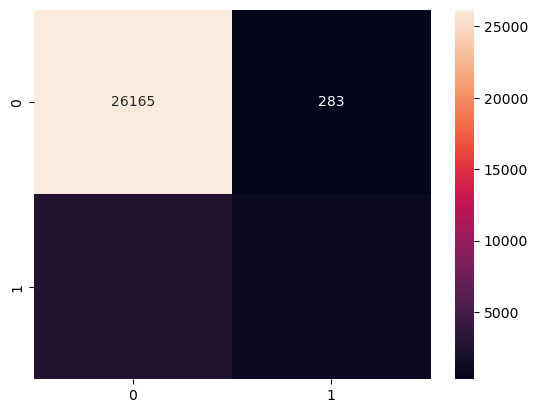

In [93]:
sns.heatmap(confusion_matrix(y_train, y_pred_xgtr), annot = True, fmt='.7g')
plt.show()

In [94]:
accuracy_score(y_train, y_pred_xgtr)

0.9033871182824377

In [96]:
print(classification_report(y_train, y_pred_xgtr))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     26448
           1       0.77      0.26      0.39      3548

    accuracy                           0.90     29996
   macro avg       0.84      0.63      0.67     29996
weighted avg       0.89      0.90      0.88     29996



In [97]:
# Test
confusion_matrix(y_test, y_pred_xgts)

array([[6643,   37],
       [ 770,   49]], dtype=int64)

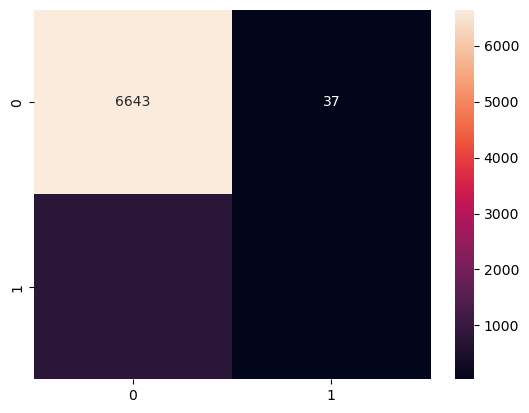

In [98]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgts), annot = True, fmt='.7g')
plt.show()

In [99]:
accuracy_score(y_test, y_pred_xgts)

0.8923856514201893

# Hyperparameter Tuning

In [101]:
parameters = {

    'n_estimators' : [100, 200],
    'learning_rate' : [0.1, 0.01, 1.0, 0.05],
    'max_depth' : [3, 4 ,5],
    'gamma' : [0.2, 0.3],
    'reg_alpha' : [0.1, 1, 0.2],
    'reg_lambda' : [0.1, 1]
}

parameters

{'n_estimators': [100, 200],
 'learning_rate': [0.1, 0.01, 1.0, 0.05],
 'max_depth': [3, 4, 5],
 'gamma': [0.2, 0.3],
 'reg_alpha': [0.1, 1, 0.2],
 'reg_lambda': [0.1, 1]}

# Perform Grid Search CV

In [103]:
grid_search = GridSearchCV(estimator = xgb, param_grid = parameters, scoring = 'accuracy', cv = 5, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.890 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.890 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.896 total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.894 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.896 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.891 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.890 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.7,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2, 0.3],
                         'learning_rate': [0.1, 0.01, 1.0, 0.05],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'reg_alpha': [0.1, 1, 0.2], 'reg_lambda': [0.1, 1]},
             scoring='accuracy', verbose=3)

In [104]:
print(f'Best Selected Hyperparameters: \n\n{grid_search.best_params_}\n')

print(f'Best Estimator: \n\n{grid_search.best_estimator_}')

Best Selected Hyperparameters: 

{'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0.2, 'reg_lambda': 0.1}

Best Estimator: 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [105]:
print(f'Training Accuracy : {grid_search.score(X_train, y_train)}')

print(f'Test Accuracy : {grid_search.score(X_test, y_test)}')


Training Accuracy : 0.8968862515002001
Test Accuracy : 0.89985331377517
